In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [2]:
#Importing data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [5]:
#Standardising column names
df.columns = ['_'.join(name.lower().split()[:3]) for name in df.columns]

#Standardising categorical values
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

#Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in df.columns[2:]:
    print(col.upper(), end=': ')
    print(df[col].unique())
    print()

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

## Issues by column:

By going through the above unique entires of every column, we have observed the following inconsistencies:

lead_source: WeLearn and WeLearnblog_home are one and the same. Facebook and social media are two different categories.

country: "Australia", the asian Countries and "Asia/Pacific Region" are two different categories.

tags: "invalid number" and "wrong number given" are one and the same.

last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.

## Other potential issues:

Many columns exist with only a single category (Redundant columns).

Same category percieved as different due to not matching case.

The value Select is equivalent to NaN.

Possible overlaps may exist in City column.

In [7]:
#Removing redundant columns
df.drop(['prospect_id', 'lead_number', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity'], axis=1, inplace=True)

#Replacing all 'select' values with NaN
df = df.replace('select', np.nan)

#Replacing "wrong number given" with "invalid number"
df.tags = df.tags.replace("wrong_number_given", "invalid_number")

#Cleaning "lead_source column"
value_counts = df.lead_source.value_counts()

#Values with frequency less than 30 are classified under "others"
df.lead_source = df.lead_source.replace(value_counts[value_counts < 30].index, "others")

#Cleaning "country"
value_counts = df.country.value_counts()

#We will categorise Country in binary as 'India' and 'Other' 
df.country = df.country.replace(df.country[df.country != 'india'].dropna().unique(), "others")

## Dealing with NaN values

In [9]:
#Percentage of NA values in every column
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
lead_source                     0.39
through_recommendations         0.00
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
magazine                        0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
d

In [10]:
#Column "how_did_you" has too many NA values that can not be imputed. It is better to drop the column. 
df.drop('how_did_you', axis=1, inplace=True)

#Column "lead_profile" has too many NA values that can not be imputed.
print(df.lead_profile.value_counts())

print("\n\nWe could convert the column to binary by defining whether it is a 'potential_lead' or not.")
print(f"\nIf made binary variable:\nis_potential_lead: {df.lead_profile.value_counts()[0]}\nis_not_lead: {len(df) - df.lead_profile.value_counts()[0]}\n")
print("But given the high frequency of NA values, There is a lot of uncertainty whether those values are leads or not. This forces us to drop the column altogether.")

df.drop('lead_profile', axis=1, inplace=True)

potential_lead                 1613
other_leads                     487
student_of_someschool           241
lateral_student                  24
dual_specialization_student      20
Name: lead_profile, dtype: int64


We could convert the column to binary by defining whether it is a 'potential_lead' or not.

If made binary variable:
is_potential_lead: 1613
is_not_lead: 7627

But given the high frequency of NA values, There is a lot of uncertainty whether those values are leads or not. This forces us to drop the column altogether.


In [11]:
#Column "lead_quality" has 52% NA values. We'll classify them as "not_sure".
df.lead_quality.fillna("not_sure", inplace=True)
print(df.lead_quality.value_counts())

not_sure             5859
might_be             1560
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: lead_quality, dtype: int64


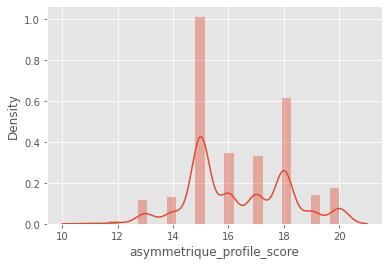

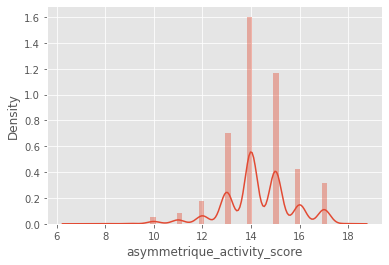

Both scores roughly follow standard distribution, therefore imputation can be done by median value.
Though instead of using scores, we shall use the categorical index columns derived from these scores.
Missing values will be filled by most frequently occuring category.


In [12]:
#Asymmetrique scores
for col in ['profile_score', 'activity_score']:
    sns.distplot(df['asymmetrique_'+col].dropna())
    plt.show()
    
print(f"Both scores roughly follow standard distribution, therefore imputation can be done by median value.\nThough instead of using scores, we shall use the categorical index columns derived from these scores.\nMissing values will be filled by most frequently occuring category.")

#Dropping Scores (Only Indexes will be used)
df.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score'], axis=1, inplace=True)

#Removing initial numbers from category naming
df['asymmetrique_profile_index'] = df['asymmetrique_profile_index'].str[3:]
df['asymmetrique_activity_index'] = df['asymmetrique_activity_index'].str[3:]

#Replacing nan with most commonly occuring category
df['asymmetrique_activity_index'].fillna(df['asymmetrique_activity_index'].mode().values[0], inplace=True)
df['asymmetrique_profile_index'].fillna(df['asymmetrique_profile_index'].mode().values[0], inplace=True)

In [13]:
#Imputing for 'Country' and 'City'
print("\nWe'll first try understanding how cities are labelled for different country categories\n")

for country in df.country.dropna().unique():
    print(country.upper())
    print(df[df.country == country]['city'].value_counts())
    print()
    
print("It looks like customers outside India are wrongly marked as being from domestic cities.\n")

print("\nLets look at how countries are labeled w.r.t city categories\n")
for city in df.city.dropna().unique():
    print(city.upper())
    print(df[df.city == city]['country'].value_counts())
    print()
    
#We will make a new city label ('international') for countries labeled as 'others'
df.city[df.country == "others"] = df.city[df.country == "others"].replace(df.city[df.country == "others"].unique(), 'international')

#We'll also assume that rows with a domestic city label will have to have country label as 'india'.
df.country[(df.city != "international") & ~df.city.isna()] = 'india'

#We'll assume that rows with a country label 'india 'will have most frequently occuring city label.
df.city[(df.country == "india") & (df.city.isna())] = 'mumbai'


We'll first try understanding how cities are labelled for different country categories

INDIA
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: city, dtype: int64

OTHERS
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: city, dtype: int64

It looks like customers outside India are wrongly marked as being from domestic cities.


Lets look at how countries are labeled w.r.t city categories

MUMBAI
india     2918
others      93
Name: country, dtype: int64

THANE_&_OUTSKIRTS
india     651
others     21
Name: country, dtype: int64

OTHER_METRO_CITIES
india     345
others     20
Name: country, dtype: int64

OTHER_CITIES
india     564
others     67
Name: country, d

In [14]:
print(f"There are {len(df[(df.city.isna()) & (df.country.isna())])} entries where both country and city are NA")
print("We'll mark these as 'unknown'")
df[['city', 'country']] = df[['city', 'country']].fillna('unknown', axis=1)

There are 2055 entries where both country and city are NA
We'll mark these as 'unknown'


In [15]:
#Few columns have less than 2% na values. We can afford to drop their respective rows altogehter. 
df.dropna(subset=['totalvisits', 'page_views_per', 'lead_source'], inplace=True)

#There are too many NA values with no logical way to impute in these columns so we will drop them entirely
df.drop(['specialization', 'tags', 'what_matters_most', 'what_is_your'] , axis=1, inplace=True)

round(df.isna().sum().sort_values(ascending=False), 2)

lead_origin                    0
lead_source                    0
a_free_copy                    0
asymmetrique_profile_index     0
asymmetrique_activity_index    0
city                           0
lead_quality                   0
through_recommendations        0
digital_advertisement          0
newspaper                      0
x_education_forums             0
newspaper_article              0
magazine                       0
search                         0
country                        0
page_views_per                 0
total_time_spent               0
totalvisits                    0
converted                      0
do_not_call                    0
do_not_email                   0
last_notable_activity          0
dtype: int64

In [16]:
#Dummy encoding for the categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)

#Getting the cleaned df
clean_df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
clean_df = pd.concat([clean_df, dummies], axis=1)

clean_df.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
print(f"{round(len(clean_df)/9239*100,2)}% data has been retained after data cleaning.")

98.21% data has been retained after data cleaning.


# EDA

### Correlations

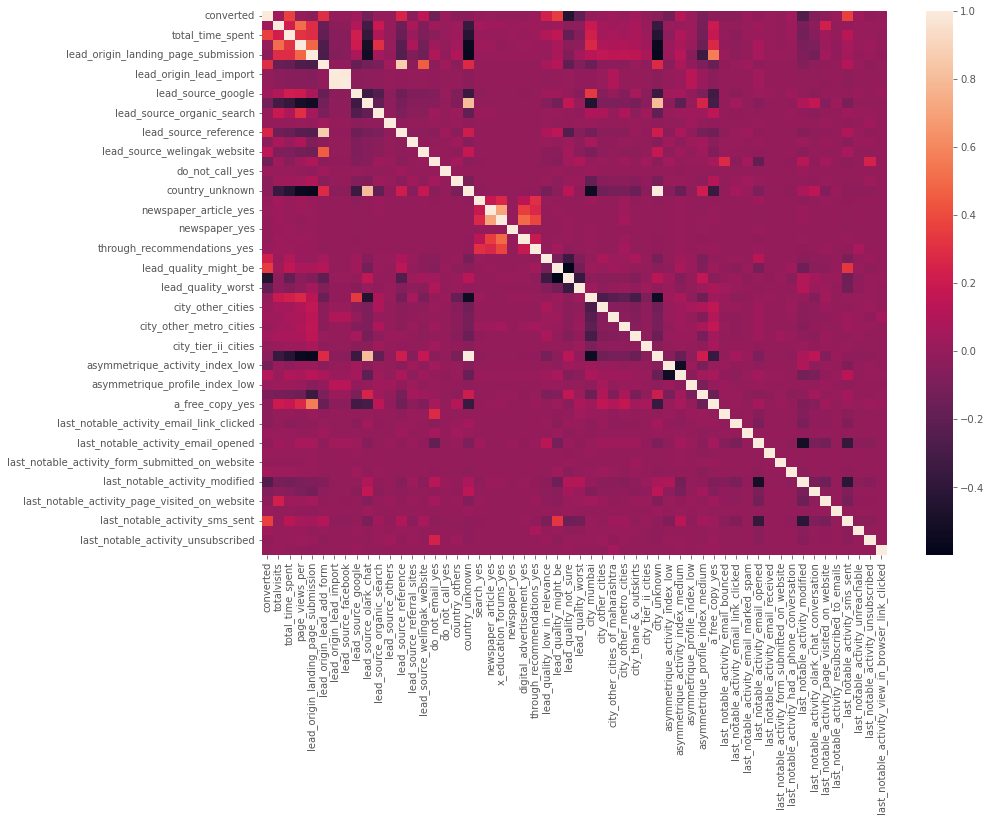

In [18]:
#Visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(clean_df.corr())
plt.show()

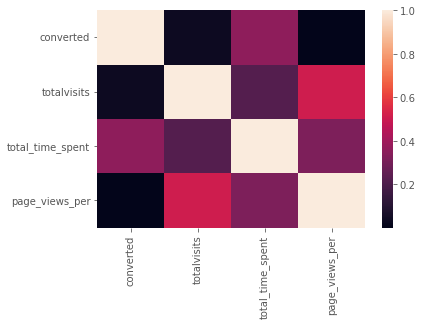

In [19]:
#Heatmap of only continuous variables
sns.heatmap(clean_df[clean_df.columns[:4]].corr())
plt.show()

In [21]:
#Columns pairs in order of highest absolute correlation
clean_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

converted                            converted                              1.000000
lead_source_facebook                 lead_origin_lead_import                0.983684
lead_source_reference                lead_origin_lead_add_form              0.866191
lead_source_olark_chat               city_unknown                           0.803772
newspaper_article_yes                x_education_forums_yes                 0.707068
lead_quality_might_be                lead_quality_not_sure                  0.597667
country_unknown                      lead_origin_landing_page_submission    0.566471
lead_origin_landing_page_submission  a_free_copy_yes                        0.564863
page_views_per                       country_unknown                        0.556781
city_mumbai                          country_unknown                        0.536886
lead_origin_landing_page_submission  lead_source_olark_chat                 0.528424
asymmetrique_activity_index_low      asymmetrique_activity_index_

In [22]:
#Dropping variables with high multi-collinearity
clean_df.drop(['lead_source_facebook', 'lead_origin_lead_add_form', 'lead_source_olark_chat'], axis=1, inplace=True)

#Top 5 features correlated with target variable
clean_df.corr()['converted'].abs().sort_values(ascending=False).head(6)[1:]

lead_quality_not_sure             0.443920
last_notable_activity_sms_sent    0.360233
total_time_spent                  0.359261
lead_quality_might_be             0.349936
last_notable_activity_modified    0.263532
Name: converted, dtype: float64

## Univariate and Outlier Analysis

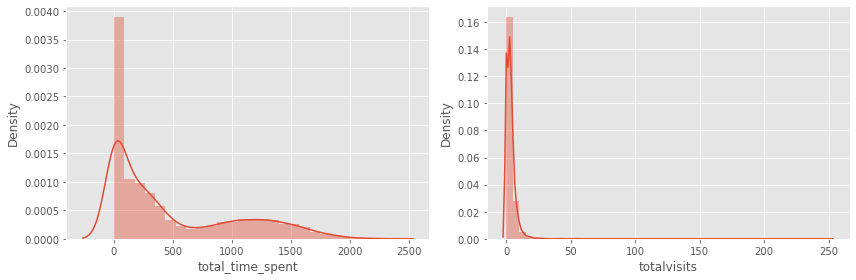

In [23]:
#Histogram
def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(clean_df['total_time_spent'])

    plt.subplot(122)
    sns.distplot(clean_df['totalvisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

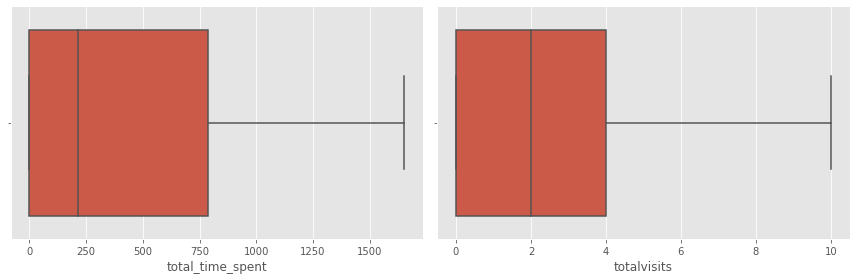

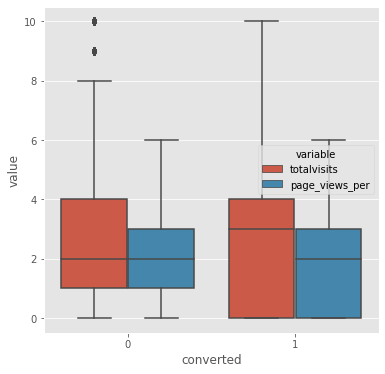

In [70]:
#Boxplots before outlier removal
num_df = clean_df[['converted', 'totalvisits',  'page_views_per', 'total_time_spent']]

def plot_boxes():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.boxplot(data=clean_df, x='total_time_spent')

    plt.subplot(122)
    sns.boxplot(data=clean_df, x='totalvisits')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    box_long = pd.melt(num_df.drop('total_time_spent', axis=1), id_vars='converted')
    sns.boxplot(x='converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()

In [26]:
#Removing outliers
out_df = num_df.drop('converted', axis=1)
q = out_df.quantile(0.97)
out_df = out_df[out_df < q]
out_df = out_df.dropna()

clean_df = clean_df.loc[out_df.index].reset_index(drop=True)
num_df = num_df.loc[out_df.index].reset_index(drop=True)

print(f"{round(len(clean_df)/9239*100,2)}% data has been retained after outlier removal.")

88.78% data has been retained after outlier removal.


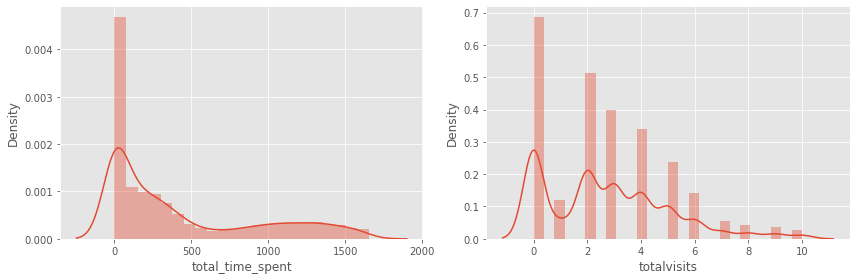

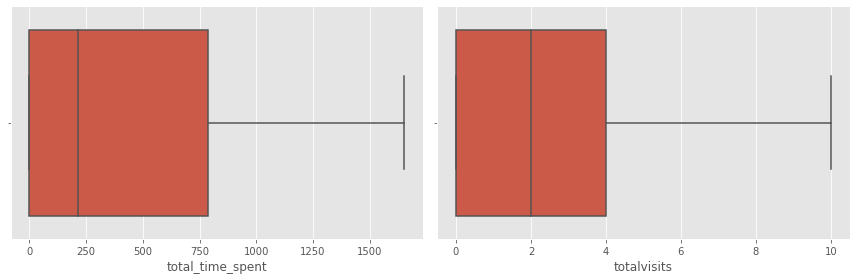

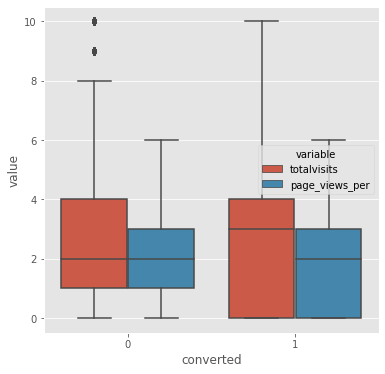

In [27]:
#After Outlier removal
plot_bars()
plot_boxes()

## Bivariate Analysis

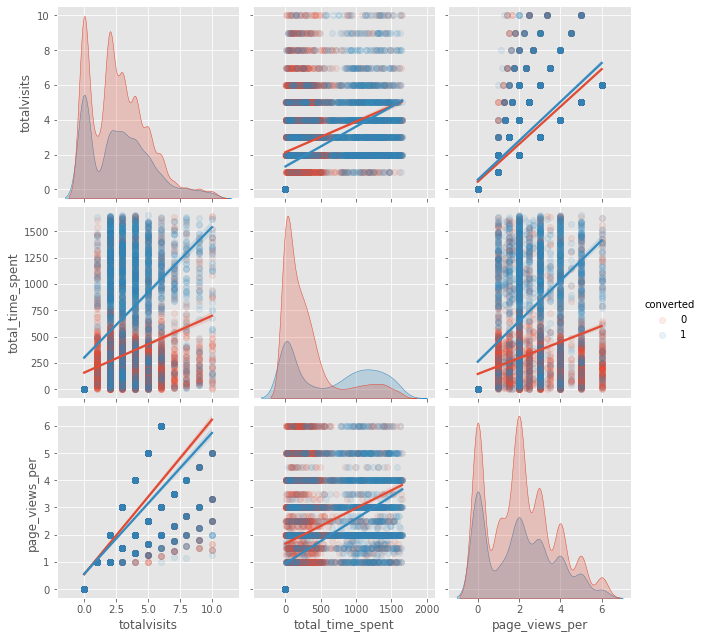

In [29]:
sns.pairplot(data=clean_df, vars=clean_df.columns[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

# Building the Predictive Model

### Splitting into Train and Test 

We will perform stratified split to prevent the effect of class imbalance of target variable, thus preventing bias.

In [30]:
#Stratified Train Test Split
X = clean_df.drop('converted', axis=1)
y = clean_df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

### Scaling (Normalisation)

We will perform Min Max scaling on the Continuous numerical variables

In [31]:
#Min Max Scaling
scaler = MinMaxScaler()
cols = X_train.columns
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train[cols[:3]]), columns=cols[:3])
scaled_X_train = pd.concat([scaled_X_train, X_train.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

scaled_X_test = pd.DataFrame(scaler.transform(X_test[cols[:3]]), columns=cols[:3])
scaled_X_test = pd.concat([scaled_X_test, X_test.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

### PCA

In [33]:
#Generating principal components of continuous variables
pca = PCA(random_state=42)
decomp_df = pca.fit_transform(scaled_X_train[cols[:3]])
pc_frame = pd.DataFrame({'Features': cols[:3], 'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2]})
pc_frame

,Features,PC1,PC2,PC3
0,totalvisits,0.512978,-0.369512,0.774800
1,total_time_spent,0.597301,0.801911,-0.013018
2,page_views_per,0.616510,-0.469467,-0.632073


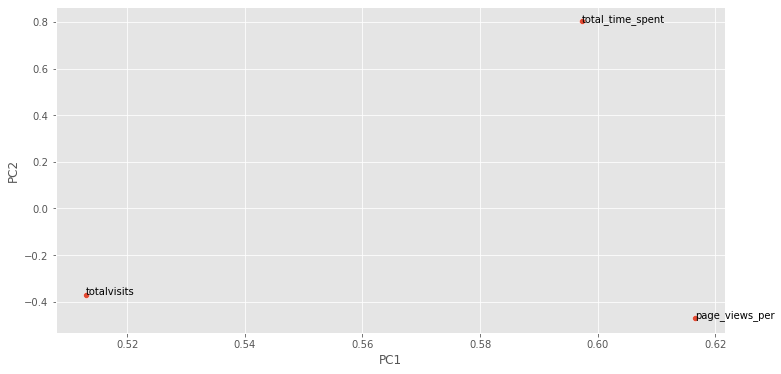

In [35]:
#Plotting 2 principal compnonents for the numeric variables
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pc_frame, x='PC1', y='PC2')
for i, text in enumerate(pc_frame.Features):
    plt.annotate(text, (pc_frame.PC1[i], pc_frame.PC2[i]))

plt.show()

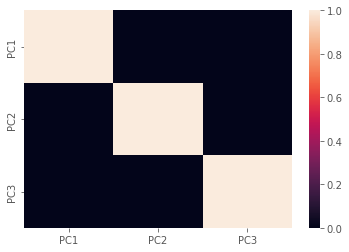

In [36]:
#No correlation exists between the PCs
decomp_df = pd.DataFrame(decomp_df, columns=['PC1', 'PC2', 'PC3'])
sns.heatmap(decomp_df.corr())
plt.show()

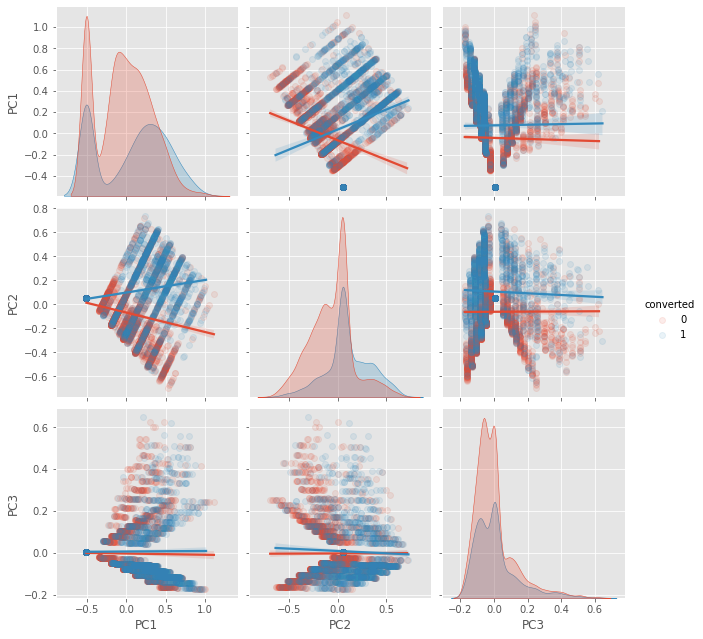

In [37]:
#Pairplot Of all 3 PCs
sns.pairplot(data=pd.concat([decomp_df, y_train.reset_index(drop=True)], axis=1),
             vars=['PC1', 'PC2', 'PC3'], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})

plt.show()

In [38]:
#We'll use all 3 principal components
scaled_X_train = pd.concat([scaled_X_train.reset_index(drop=True), decomp_df], axis=1)

#Applying to test set
decomp_test = pca.transform(scaled_X_test[cols[:3]])
decomp_test = pd.DataFrame(decomp_test, columns=['PC1', 'PC2', 'PC3'])
scaled_X_test = pd.concat([scaled_X_test.reset_index(drop=True), decomp_test], axis=1)

### Recurssive Feature Elimination and Cross Validation

By iterating through number of features we will see which model gives highest result.

In [52]:
def optimal_features(min, max):
    
    opt = list()
    for features in range(min, max):
        log_reg = LogisticRegression(C=2, random_state=42)
        rfe = RFE(estimator=log_reg, n_features_to_select=features)
        rfe.fit(scaled_X_train, y_train)
        cols = scaled_X_train.columns[rfe.support_]

        #Cross Validation
        scores = cross_validate(log_reg, scaled_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
        opt.append((features, scores['test_accuracy'].mean()))
        
    opt = np.array(opt) 
    return opt, opt[opt[:, 1].argmax()]
    

feat_array, opt_features = optimal_features(10, 50)

Here we'll plot how accuracy changes with number of features considered.

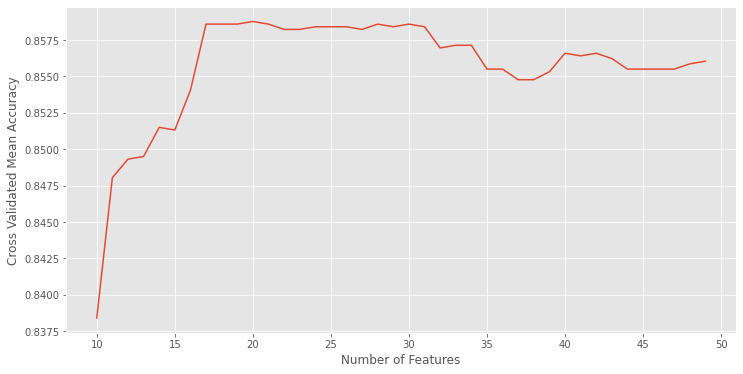

Optimal number of features to use is 20.0 which gives 0.8587807097361237 accuracy.


In [55]:
plt.figure(figsize=(12, 6))
plt.plot(feat_array[:, 0], feat_array[:, 1])
plt.xlabel("Number of Features")
plt.ylabel("Cross Validated Mean Accuracy")
plt.show()

print(f"Optimal number of features to use is {opt_features[0]} which gives {opt_features[1]} accuracy.")

In [57]:
#RFE
log_reg = LogisticRegression(C=2, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=int(opt_features[0]))
rfe.fit(scaled_X_train, y_train)
cols = scaled_X_train.columns[rfe.support_]
print(f"The columns we'll be using are:\n\n{cols}")

The columns we'll be using are:

Index(['total_time_spent', 'lead_source_others', 'lead_source_reference',
       'lead_source_welingak_website', 'do_not_email_yes', 'do_not_call_yes',
       'search_yes', 'lead_quality_might_be', 'lead_quality_not_sure',
       'lead_quality_worst', 'city_unknown', 'asymmetrique_activity_index_low',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_olark_chat_conversation',
       'last_notable_activity_resubscribed_to_emails',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'PC1', 'PC2', 'PC3'],
      dtype='object')


### VIF

In [58]:
#Manual Elimination by VIF analysis
def get_vif():
    vif = pd.DataFrame()
    vif['Features'] = scaled_X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(scaled_X_train[cols].values, i) for i in range(scaled_X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
get_vif()

,Features,VIF
0,total_time_spent,24.07
17,PC1,11.89
18,PC2,7.40
8,lead_quality_not_sure,2.73
10,city_unknown,2.22
7,lead_quality_might_be,2.20
9,lead_quality_worst,1.61
2,lead_source_reference,1.31
15,last_notable_activity_sms_sent,1.17
3,lead_source_welingak_website,1.06


The VIF of total_time_spent is too high. We will eliminate the feature and check the VIF again.

In [59]:
cols = cols.drop('total_time_spent')
get_vif().head()

,Features,VIF
9,city_unknown,2.87
16,PC1,2.17
7,lead_quality_not_sure,1.81
14,last_notable_activity_sms_sent,1.51
6,lead_quality_might_be,1.48


The factors for the columns are now in check, we can proceed further with our analysis.

### Assesing the model with statsmodel

In [60]:
to_drop = ['last_notable_activity_resubscribed_to_emails', 'lead_source_welingak_website']
X_train_sm = sm.add_constant(scaled_X_train[cols].drop(to_drop, axis=1))
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5477
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2002.8
Date:                Sun, 12 Mar 2023   Deviance:                       4005.7
Time:                        16:31:46   Pearson chi2:                 5.53e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4427
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3945      0.136     10.228      0.000       1.127       1.662
lead_source_others                                 0.8672      0.739      1.173      0.241      -0.582       2.316
lead_source_reference                              1.8215      0.274      6.651      0.000       1.285       2.358
do_not_email_yes                                  -1.1489      0.198     -5.805      0.000      -1.537      -0.761
do_not_call_yes                                   19.8400   1.24e+04      0.002      0.999   -2.42e+04    2.43e+04
search_yes                                        -2.1506      1.323     -1.625      0.104      -4.744       0.443
lead_quality_might_be                             -1.5591      0.167     -9.338      0.000      -1.886      -1.232
lead_quality_not_sure                             -3.5750      0.153    -23.403      0.000      -3.874      -3.276
lead_quality_worst                                -5.6708      0.414    -13.688      0.000      -6.483      -4.859
city_unknown                                       1.4876      0.146     10.196      0.000       1.202       1.774
asymmetrique_activity_index_low                   -1.8108      0.297     -6.100      0.000      -2.393      -1.229
last_notable_activity_had_a_phone_conversation     2.4106      1.261      1.911      0.056      -0.062       4.883
last_notable_activity_olark_chat_conversation     -1.0743      0.363     -2.961      0.003      -1.785      -0.363
last_notable_activity_sms_sent                     1.8617      0.093     20.098      0.000       1.680       2.043
last_notable_activity_unreachable                  2.0966      0.647      3.242      0.001       0.829       3.364
PC1                                                1.8092      0.158     11.475      0.000       1.500       2.118
PC2                                                2.9998      0.175     17.108      0.000       2.656       3.344
PC3                                                1.7109      0.326      5.250      0.000       1.072       2.350
==================================================================================================================
"""

### Fitting the model

In [61]:
#Cross Validation
scores = cross_validate(log_reg, scaled_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

log_reg.fit(scaled_X_train[cols], y_train)
pred = log_reg.predict(scaled_X_train[cols])
prob_est = log_reg.predict_proba(scaled_X_train[cols])

Cross validated mean accuracy: 0.859


# Measuring Model Performance

The data available at hand has class imbalance and therefore accuracy is not a good enough metric to measure if model is good enough.

Sensitivity (Recall) tells us what percentage of leads that were converted, were correctly identified as converted.

Specificity tells is what percentage of leads that were NOT converted were correctly identified.

Precision is, given a positive test result, the sample is positive.

If correctly identifying positives is important for us, then we should choose a model with higher Sensitivity. However, if correctly identifying negatives is more important, then we should choose specificity as the measurement metric.

F1 score is the weighted average of the precision and recall, and is a good metric to hold the model against.

Sensitivity (Recall): 0.773247140726007
Specificity: 0.9090126291618829
Precision: 0.8306623931623932
F-Score: 0.8009271182075715


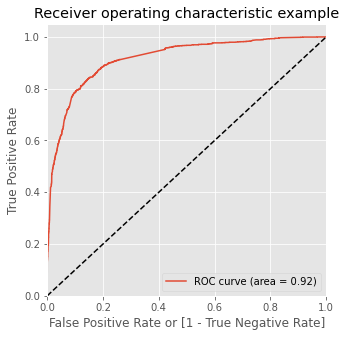

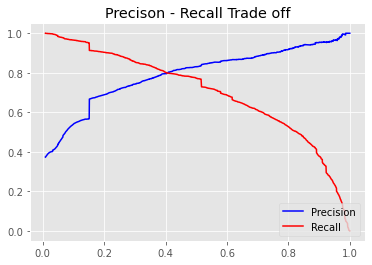

In [63]:
def draw_roc(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def get_metrics(y, pred, prob_est):
    #Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    #Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    #Reciever Operating Characteristic Curve
    draw_roc(y, prob_est[:, 1])

    #Precision Recall Curve
    draw_prec_recall(y, prob_est[:, 1])
    
get_metrics(y_train, pred, prob_est)

# Finding Optimal Cut-Off

In [65]:
#Making y_train_pred_final
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

#Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

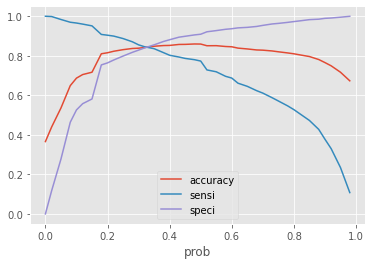

Optimum cut-off value is: 0.32


In [66]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")


Accuracy: 0.8420382165605096
Sensitivity (Recall): 0.8453505718547986
Specificity: 0.8401262916188289
Precision: 0.7532122286220647
F-Score: 0.7966260543580131


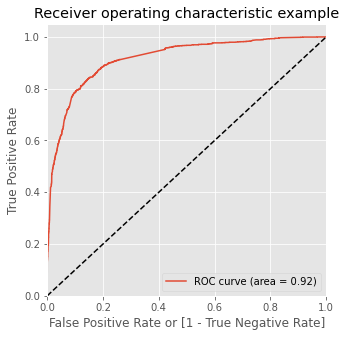

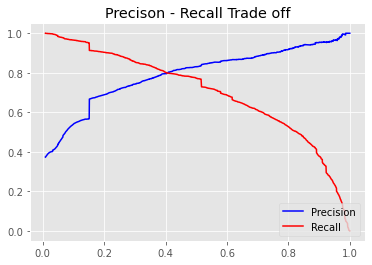

In [67]:
#New predicted values based on cut-off
pred = (log_reg.predict_proba(scaled_X_train[cols])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

# Measuring Performance on Test Set

accuracy: 0.8511267085334319
Sensitivity (Recall): 0.8505050505050505
Specificity: 0.8514851485148515
Precision: 0.7675478577939836
F-Score: 0.8068998562529947


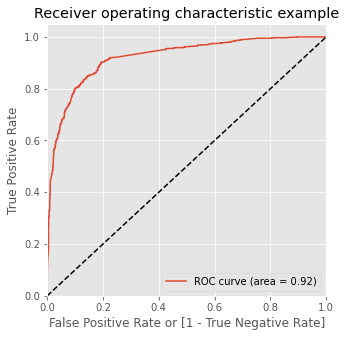

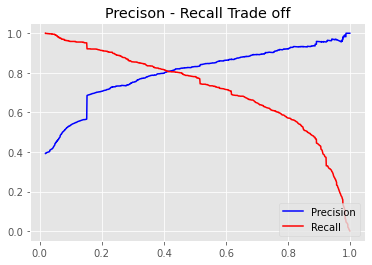

In [68]:
#Scoring against Test Set
log_reg.fit(scaled_X_train[cols], y_train)
pred = (log_reg.predict_proba(scaled_X_test[cols])[:, 1] >= cutoff_value).astype(int)
prob_est = log_reg.predict_proba(scaled_X_test[cols])
print(f"accuracy: {accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)

Finally, we have an overall accuracy of about 0.85 on our Logistic Regression model. That is, there is 85% chance that our predicted leads will be converted. This meets the CEO's target of atleast 80% lead conversion.

# Lead Scoring

We will perform lead-scoring on the test set.

In [69]:
scores = pd.DataFrame({'lead_score':(prob_est[:, 1]*100).astype('int'), 'predicted_outcome': pred, 'actual_outcome': y_test}).reset_index(drop=True)
scores.head()

,lead_score,predicted_outcome,actual_outcome
0,15,0,0
1,93,1,1
2,0,0,0
3,77,1,1
4,92,1,1
